# Ngoc Ha
# HW 3 - ST 557

## Problem 1

In [14]:
scores <- read.csv("TestScores.csv")
head(scores)

SocSciHist,Verbal,Science
468,41,26
428,39,26
514,53,21
547,67,33
614,61,27
501,67,29


In [15]:
X1 <- scores$SocSciHist
X2 <- scores$Verbal
X3 <- scores$Science

### (1a) $H_0:\mu = [500,50,30]^T; H_A:\mu \neq [500,50,30]^T; \alpha = 0.05$

In [16]:
n <- length(scores[,1])
muNull <- c(500, 50, 30)
muVec <- c(mean(X1), mean(X2), mean(X3))
alpha <- 0.05
covar <- var(scores)
covarInv <- solve(covar)

In [17]:
t2 <- n*t(muVec-muNull)%*%covarInv%*%(muVec-muNull)
t2stat <- (n-3)/((n-1)*3)*t2
Fcrit <- df(0.05, df1 = 3, df2 = n-3)

In [18]:
cat("Reject Null hypothesis:", t2stat>Fcrit)

Reject Null hypothesis: TRUE

$[500,50,30]^T$ lies outside of the 95% Confidence Interval, so there's a reason to believe that the population of students in 2011 is scoring differently from previous years.

### (1b) Lengths and directions

In [19]:
eiDec <- eigen(covar)
eiDec

eigen() decomposition
$values
[1] 5878.79165   63.83510   14.59806

$vectors
           [,1]         [,2]         [,3]
[1,] 0.99390539  0.103731534 -0.037307396
[2,] 0.10344339 -0.994589227 -0.009577815
[3,] 0.03809906 -0.005660238  0.999257936


In [20]:
eiVec1 <- eiDec$vectors[,1]
eiVec2 <- eiDec$vectors[,2]
eiVec3 <- eiDec$vectors[,3]

In [21]:
scale1 <- sqrt(eiDec$values[1]*3*(n-3)/(n*(n-3))*df(0.05, df1=3, df2=n-3))
scale2 <- sqrt(eiDec$values[2]*3*(n-3)/(n*(n-3))*df(0.05, df1=3, df2=n-3))
scale3 <- sqrt(eiDec$values[3]*3*(n-3)/(n*(n-3))*df(0.05, df1=3, df2=n-3))

In [22]:
cbind(c(scale1,scale2,scale3),eiDec$vec)

9.3660059,0.99390539,0.103731534,-0.037307396
0.9759783,0.10344339,-0.994589227,-0.009577815
0.4667216,0.03809906,-0.005660238,0.999257936


### (1c)

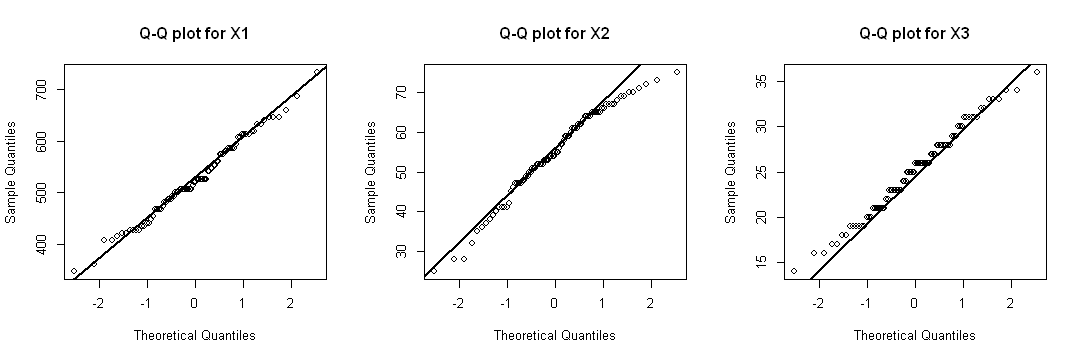

In [10]:
options(repr.plot.width=9, repr.plot.height=3)
par(mfrow=c(1,3))
qqnorm(X1, main = 'Q-Q plot for X1', ylab = 'Sample Quantiles')
qqline(X1, lwd = 2)
qqnorm(X2, main = 'Q-Q plot for X2', ylab = 'Sample Quantiles')
qqline(X2, lwd = 2)
qqnorm(X3, main = 'Q-Q plot for X3', ylab = 'Sample Quantiles')
qqline(X3, lwd = 2)

X1 and X3 appear to be normally distributed. For X2, there's some deviation from normal in the upper tail.

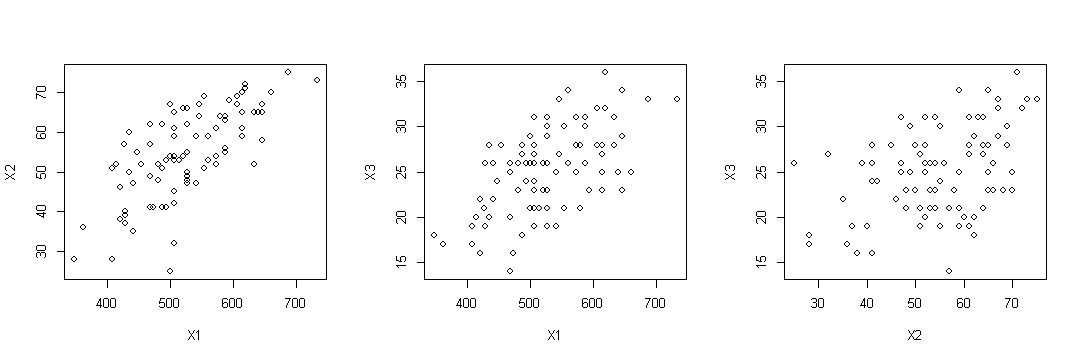

In [11]:
options(repr.plot.width=9, repr.plot.height=3)
par(mfrow=c(1,3))
plot(X1,X2)
plot(X1,X3)
plot(X2,X3)

## Problem 2

In [12]:
lumber <- read.csv('LumberData.csv')
head(lumber)

Stiffness,Bending
1232,4175
1115,6652
2205,7612
1897,10914
1932,10850
1612,7627


In [13]:
X1 <- lumber$Stiffness
X2 <- lumber$Bending
n = 30
p = 2

### (2a)

In [14]:
mu1 <- mean(X1)
mu2 <- mean(X2)
muVec <- c(mu1,mu2)
print(muVec)

[1] 1860.500 8354.133


In [15]:
covar <- var(lumber)
eiDec <- eigen(covar)
eiVec1 <- eiDec$vectors[,1]
eiVec2 <- eiDec$vectors[,2]
eiVal1 <- eiDec$values[1]
eiVal2 <- eiDec$values[2]
covar
eiDec

,Stiffness,Bending
Stiffness,124054.7,361620.4
Bending,361620.4,3486333.2


eigen() decomposition
$values
[1] 3524786.45   85601.38

$vectors
          [,1]       [,2]
[1,] 0.1057399 -0.9943938
[2,] 0.9943938  0.1057399


In [16]:
Tstat <- n*t(muVec)%*%(solve(covar))%*%(muVec)
Tstat

943.0262


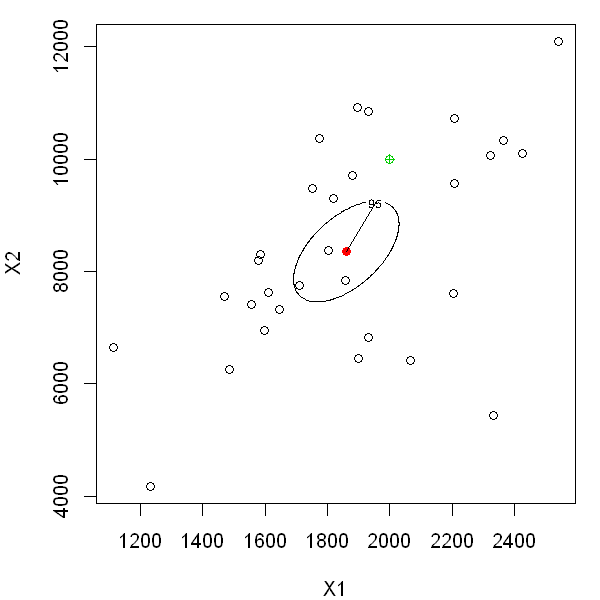

In [28]:
options(repr.plot.width=5, repr.plot.height=5)
muTest.1 <- seq(round(min(X1),-2), round(max(X1),-2), 10)
muTest.2 <- seq(round(min(X2),-2), round(max(X2),-2), 10)
Tstats <- matrix(0, nrow=length(muTest.1), ncol=length(muTest.2))
for(i in 1:length(muTest.1)){
	for(j in 1:length(muTest.2)){
		muTest <- c(muTest.1[i], muTest.2[j])
		Tstats[i,j] <- n*t(muVec - muTest) %*% solve(covar) %*% (muVec - muTest)
	}
}

par(mar=c(4,4,1,1))

# Plot the data, and superimpose the confidence ellipsoids
# using the contour() function.  

plot(lumber, xlab="X1", ylab="X2")
points(mu1, mu2, pch=16, col=2)
points(2000, 10000, pch=10, col=3)
contour(muTest.1, muTest.2, Tstats, levels=(n-1)*p/(n-p)*qf(0.95, p, n-p), drawlabels=T, add=T, labels=95)

# Add a line from the sample mean indicating the direction 
# and half-length of the major axis of the confidence region.

lines(rbind(muVec, muVec + sqrt(eiVal1*(n-1)*p/(n-p)*qf(0.95, p, n-p)/n)*eiVec1))

### (2b) $\mu_0 = [2000, 10000]^T$

$\mu_0$ lies outside of the 95% confidence ellipsoid, so it's not a plausible mean vector for this dataset.

## Problem 3

In [34]:
bone <- read.csv('BoneMineral.csv')
alpha = 0.05; p = 6; n = dim(bone)[1]
head(bone)

dRadius,nRadius,dHumerus,nHumerus,dUlna,nUlna
1.103,1.052,2.139,2.238,0.873,0.872
0.842,0.859,1.873,1.741,0.590,0.744
0.925,0.873,1.887,1.809,0.767,0.713
0.857,0.744,1.739,1.547,0.706,0.674
0.795,0.809,1.734,1.715,0.549,0.654
0.787,0.779,1.509,1.474,0.782,0.571


### (3a) 95% Bonferroni intervals

In [36]:
# Compute the sample mean vector and sample covariance matrix

sampMean <- apply(bone, 2, mean)
sampVars <- apply(bone, 2, var)
sampCov <- cov(bone)

# Set desired significance level alpha

alpha <- 0.05

# Compute Bonferroni corrected significance level as alpha/p

alphaStar <- alpha/p

# Compute the upper and lower confidence limits for all variables
# simultaneously, using R's vector operations

upperBon <- sampMean + sqrt(sampVars/n)*qt(alphaStar/2, df=n-1, lower.tail=F)
lowerBon <- sampMean - sqrt(sampVars/n)*qt(alphaStar/2, df=n-1, lower.tail=F)
cbind(lowerBon, upperBon)

,lowerBon,upperBon
dRadius,0.7782338,0.9093662
nRadius,0.7568766,0.8797634
dHumerus,1.6296774,1.9556826
nHumerus,1.5832656,1.8864144
dUlna,0.6425529,0.7662471
nUlna,0.6346406,0.7530394


### (3b) 95% $T^2$ intervals

In [39]:
upperHot <- sampMean + sqrt( p*(n-1)/(n-p)*qf(alpha, p, n-p, lower.tail=F)*sampVars/n )
lowerHot <- sampMean - sqrt( p*(n-1)/(n-p)*qf(alpha, p, n-p, lower.tail=F)*sampVars/n )
cbind(lowerHot, upperHot)

,lowerHot,upperHot
dRadius,0.7420179,0.9455821
nRadius,0.7229380,0.9137020
dHumerus,1.5396419,2.0457181
nHumerus,1.4995425,1.9701375
dUlna,0.6083914,0.8004086
nUlna,0.6019414,0.7857386


Hotelling's $T^2$ simultaneous intervals are wider than Bonferroni's simultaneous intervals.

## Problem 4

In [1]:
flour <- read.csv('FlourBags.csv')
head(flour)

Scale1,Scale2,Scale3
10.63,10.13,10.23
9.89,9.87,9.73
10.30,10.03,9.67
10.16,10.54,10.76
9.75,9.90,10.10
10.03,10.45,10.17


In [2]:
S1 <- flour$Scale1
S2 <- flour$Scale2
S3 <- flour$Scale3
p <- 3; n <- length(flour[,1]); alpha = 0.05

### (4a) $H_0:\mu = [10,10,10]^T; H_A:\mu \neq [10,10,10]^T; \alpha = 0.05$. Hotelling's $T^2$

In [3]:
n <- length(flour[,1])
muNull <- c(10,10,10)
muVec <- c(mean(S1), mean(S2), mean(S3))
alpha <- 0.05
covar <- var(flour)
covarInv <- solve(covar)

In [4]:
t2 <- n*t(muVec-muNull)%*%covarInv%*%(muVec-muNull)
t2stat <- (n-p)/((n-1)*p)*t2
Fcrit <- df(alpha, df1 = 3, df2 = n-3)

In [5]:
cat("Reject Null hypothesis:", t2stat>Fcrit)

Reject Null hypothesis: TRUE

### (4b) $H_0:\mu = [10,10,10]^T; H_A:\mu \neq [10,10,10]^T; \alpha = 0.05$. Bonferroni

In [6]:
# Compute the sample mean vector and sample covariance matrix

sampVars <- apply(flour, 2, var)

# Compute Bonferroni corrected significance level as alpha/p

alphaStar <- alpha/p

# Compute the upper and lower confidence limits for all variables
# simultaneously, using R's vector operations

upperBon <- muVec + sqrt(sampVars/n)*qt(alphaStar/2, df=n-1, lower.tail=F)
lowerBon <- muVec - sqrt(sampVars/n)*qt(alphaStar/2, df=n-1, lower.tail=F)
cbind(lowerBon, upperBon)

,lowerBon,upperBon
Scale1,9.459005,10.00099
Scale2,9.844532,10.19547
Scale3,9.622842,10.10316


Each measurement lies inside the corresponding 95% confidence interval. Bonferroni's test **fails to reject** the Null.

### (4c)

Hotelling's $T^2$ simultaneous confidence intervals would contain $[10,10,10]^T$, because they are more conservative than Bonferroni's simultaneous confidence intervals.

### (4d)

In [9]:
S_p <- sum(sampVars)/p # pooled variance
df <- p*(n-1)
testStat <- (sum(muVec)/3-10)/sqrt(S_p)
testStat

[1] -0.3259526

In [11]:
tcrit <- dt(1-alpha/2,df=df)
tcrit

[1] 0.2458615

In [12]:
cat("Reject Null:", abs(testStat) > tcrit)

Reject Null: TRUE

## Problem 5

### (5a)

$\bf{\sum} = \bf{I_p} \implies$ elements of $\bar{X}$ are **independent**, because the pairwise covariances are all equal to zero.

### (5b)

For each individual test: $P(fails \ to \ reject \ H_0) = 1-\alpha^*$

$\implies P_{\mu_0}(Reject H_0: \mu = \mu_0) = 1 - (1-\alpha^*)^{p}$

### (5c)

$1-(1-\alpha^*)^p = \alpha \implies \alpha^* = 1- \sqrt[p]{1-\alpha}$

### (5d)

In [14]:
alpha = 0.05

#### n = 10; p = 4

In [19]:
n <- 10; p <- 4
alphaStar <- 1 - (1-alpha)^(1/p)
alphaStarBon <- alpha/p

In [20]:
cat("Bonferroni longer:", alphaStarBon < alphaStar)

Bonferroni longer: TRUE

#### n = 10; p = 8

In [21]:
n <- 10; p <- 8
alphaStar <- 1 - (1-alpha)^(1/p)
alphaStarBon <- alpha/p

In [22]:
cat("Bonferroni longer:", alphaStarBon < alphaStar)

Bonferroni longer: TRUE

#### n = 20; p = 4

In [23]:
n <- 20; p <- 4
alphaStar <- 1 - (1-alpha)^(1/p)
alphaStarBon <- alpha/p

In [24]:
cat("Bonferroni longer:", alphaStarBon < alphaStar)

Bonferroni longer: TRUE

#### n = 20; p = 8

In [25]:
n <- 20; p <- 8
alphaStar <- 1 - (1-alpha)^(1/p)
alphaStarBon <- alpha/p

In [26]:
cat("Bonferroni longer:", alphaStarBon < alphaStar)

Bonferroni longer: TRUE